In [12]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt   

In [30]:
data_inicial= '2019-01-01'
Stbp3= yf.download('STBP3.SA',  start= data_inicial)
display(Stbp3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,4.18,4.28,4.12,4.25,3.701208,2740000
2019-01-03,4.20,4.38,4.20,4.37,3.805712,1072800
2019-01-04,4.39,4.39,4.27,4.28,3.727334,1303700
2019-01-07,4.26,4.30,4.22,4.23,3.683790,862800
2019-01-08,4.27,4.34,4.22,4.22,3.675081,989900
...,...,...,...,...,...,...
2023-07-18,9.89,10.00,9.85,9.96,9.960000,1156400
2023-07-19,9.97,9.97,9.74,9.89,9.890000,1866700
2023-07-20,9.91,9.95,9.65,9.86,9.860000,3582400


In [31]:
# Renomear as colunas
stbp3 = Stbp3.rename(columns={
    'Open': 'Abertura',
    'High': 'Maior',
    'Low': 'Menor',
    'Close': 'Fechamento',
    'Adj Close': 'Fechamento Ajustado',
    'Volume': 'Volume'
})

# Atribuir novos nomes diretamente às colunas
stbp3.columns = ['Abertura', 'Maior', 'Menor', 'Fechamento', 'Fechamento Ajustado', 'Volume']
stbp3 = stbp3.round(2)

display(stbp3)

,Abertura,Maior,Menor,Fechamento,Fechamento Ajustado,Volume
Date,,,,,,
2019-01-02,4.18,4.28,4.12,4.25,3.70,2740000
2019-01-03,4.20,4.38,4.20,4.37,3.81,1072800
2019-01-04,4.39,4.39,4.27,4.28,3.73,1303700
2019-01-07,4.26,4.30,4.22,4.23,3.68,862800
2019-01-08,4.27,4.34,4.22,4.22,3.68,989900
...,...,...,...,...,...,...
2023-07-18,9.89,10.00,9.85,9.96,9.96,1156400
2023-07-19,9.97,9.97,9.74,9.89,9.89,1866700
2023-07-20,9.91,9.95,9.65,9.86,9.86,3582400


taxa simples de retorno

In [32]:
stbp3['retorno_simples']= (stbp3['Fechamento Ajustado'] / stbp3['Fechamento Ajustado'].shift(1)) -1
print(stbp3['retorno_simples'])

Date
2019-01-02         NaN
2019-01-03    0.029730
2019-01-04   -0.020997
2019-01-07   -0.013405
2019-01-08    0.000000
                ...   
2023-07-18    0.001005
2023-07-19   -0.007028
2023-07-20   -0.003033
2023-07-21    0.017241
2023-07-24   -0.001994
Name: retorno_simples, Length: 1133, dtype: float64


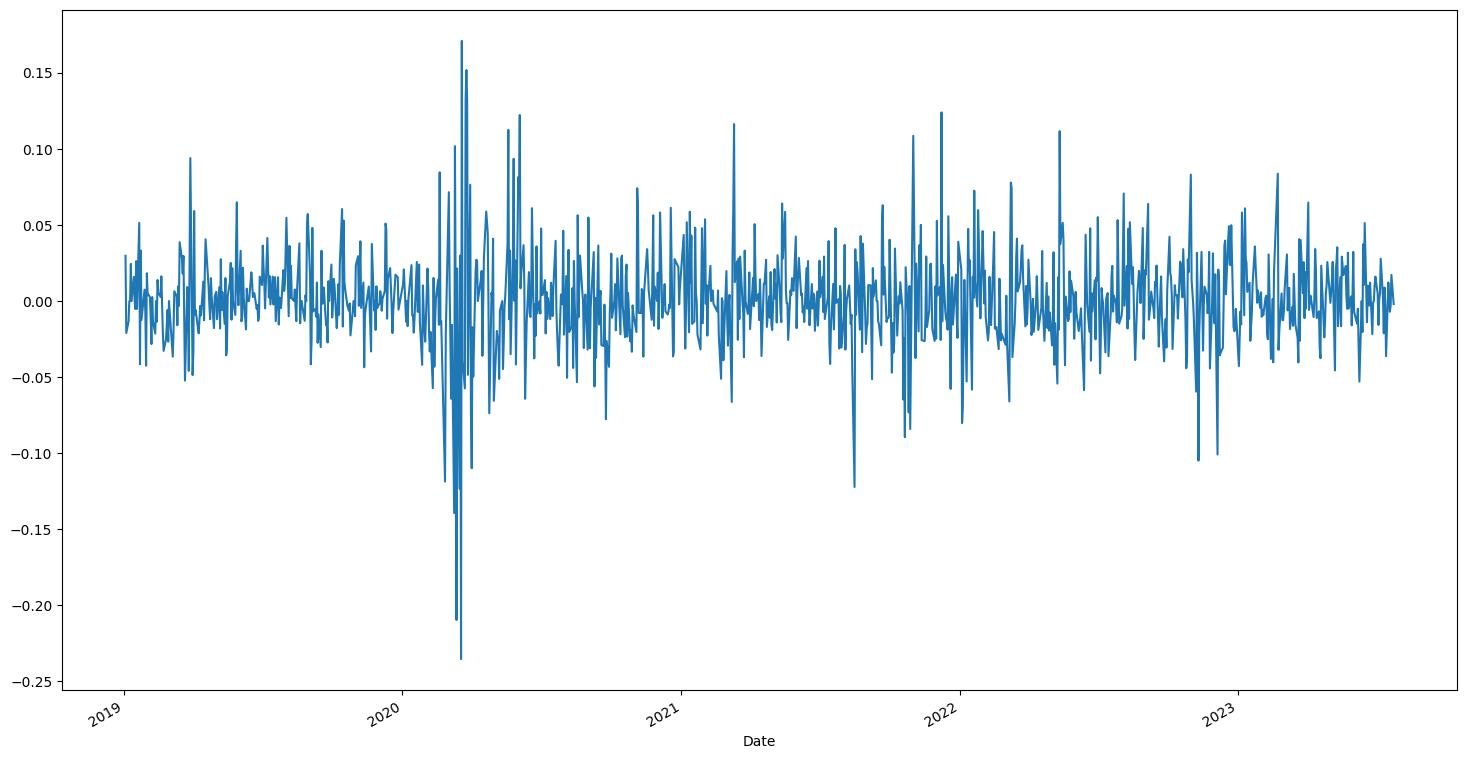

In [33]:
# grafico do retorno diário
stbp3['retorno_simples'].plot(figsize=(18,10))
plt.show()

In [34]:
retorno_dia= stbp3['retorno_simples'].mean()


In [35]:
# 250 porque não sao todos os dias que se tem negociação na B3
retorno_ano= stbp3['retorno_simples'].mean()*250

In [36]:
# passando para porcentagem
# str nesse caso é o %
# o 3 é o numero de arredondamento
print(str(round(retorno_ano,3)*100)+ '%')

34.699999999999996%


taxa de retorno logaritmico

In [37]:
stbp3.head()

,Abertura,Maior,Menor,Fechamento,Fechamento Ajustado,Volume,retorno_simples
Date,,,,,,,
2019-01-02,4.18,4.28,4.12,4.25,3.70,2740000,NaN
2019-01-03,4.20,4.38,4.20,4.37,3.81,1072800,0.029730
2019-01-04,4.39,4.39,4.27,4.28,3.73,1303700,-0.020997
2019-01-07,4.26,4.30,4.22,4.23,3.68,862800,-0.013405
2019-01-08,4.27,4.34,4.22,4.22,3.68,989900,0.000000


In [38]:
stbp3['retorno_log']= np.log(stbp3['Fechamento Ajustado'] / stbp3['Fechamento Ajustado'].shift(1))
print(stbp3['retorno_log'])

Date
2019-01-02         NaN
2019-01-03    0.029296
2019-01-04   -0.021221
2019-01-07   -0.013495
2019-01-08    0.000000
                ...   
2023-07-18    0.001005
2023-07-19   -0.007053
2023-07-20   -0.003038
2023-07-21    0.017094
2023-07-24   -0.001996
Name: retorno_log, Length: 1133, dtype: float64


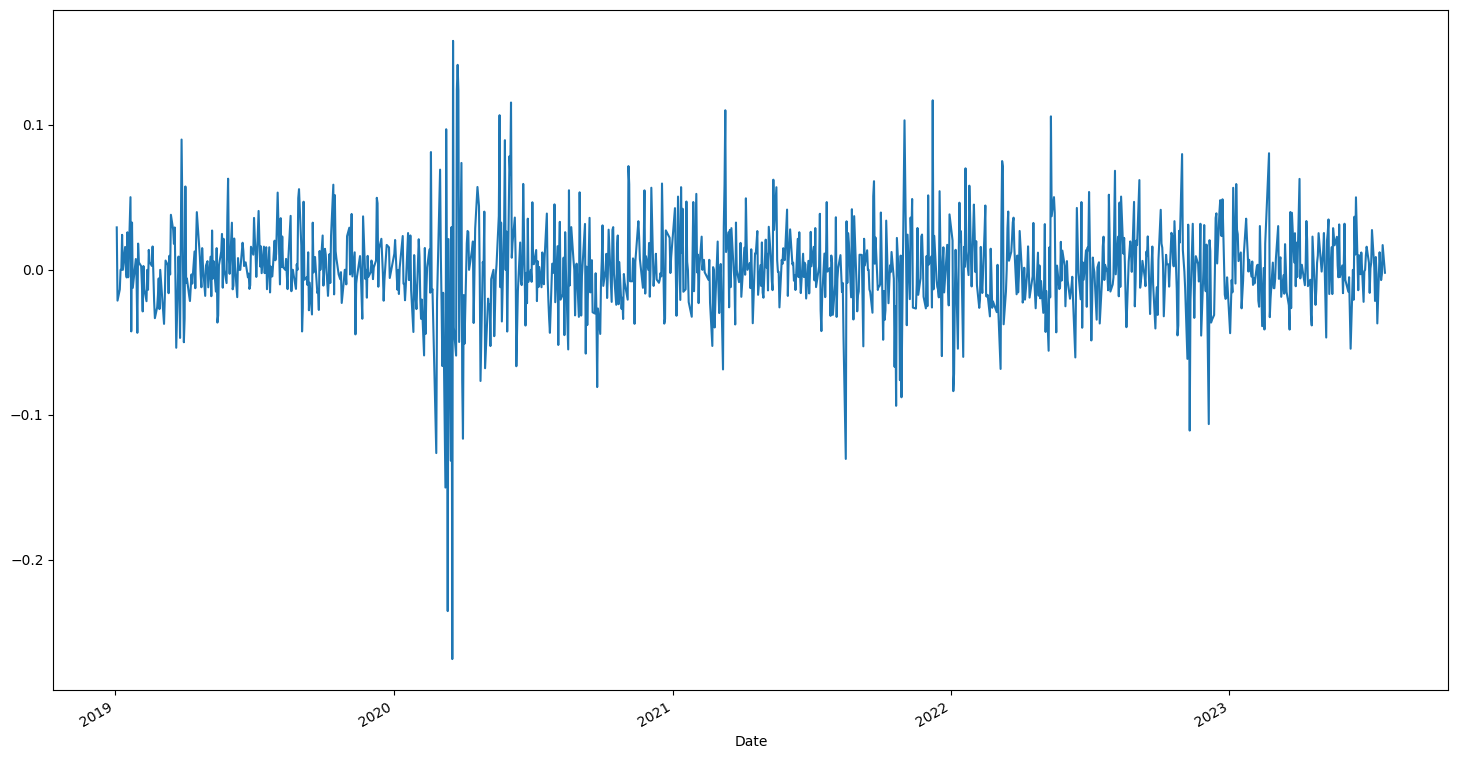

In [39]:
# grafico do retorno diário
stbp3['retorno_log'].plot(figsize=(18,10))
plt.show()

In [40]:
retorno_ano= stbp3['retorno_log'].mean()*250
print(str(round(retorno_ano,3)*100)+ '%')

22.0%
